In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from paleoseismic import PaleoseismicCatalog
import os

Questions for mike: 
- Are the historic events added?
  - Seems to be the case for some but not all events/trenches (e.g. Qatar, Hog lake)

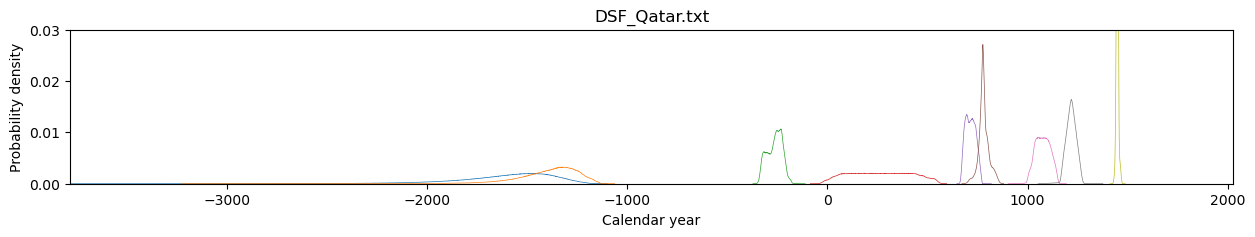

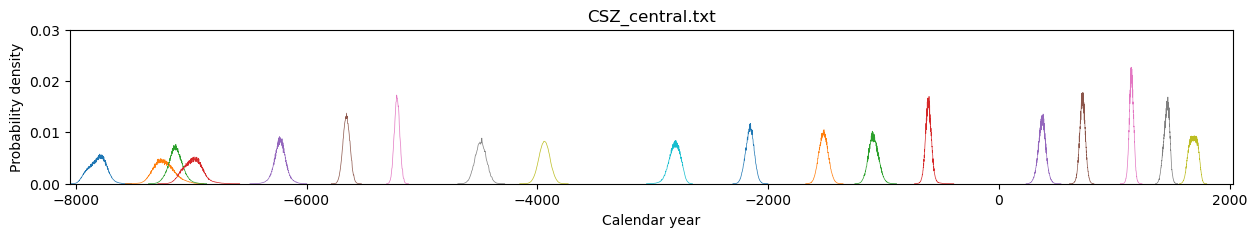

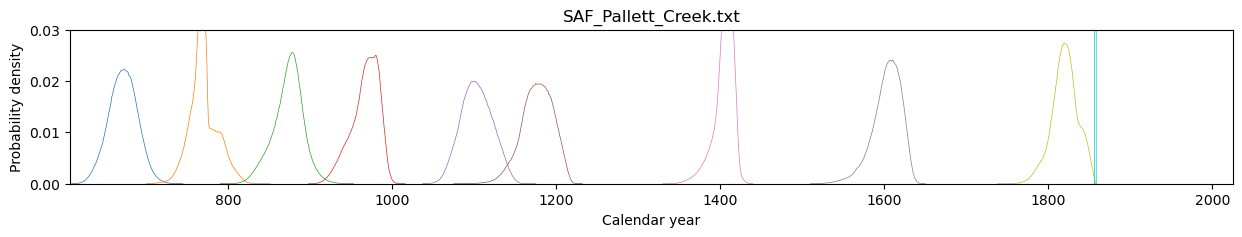

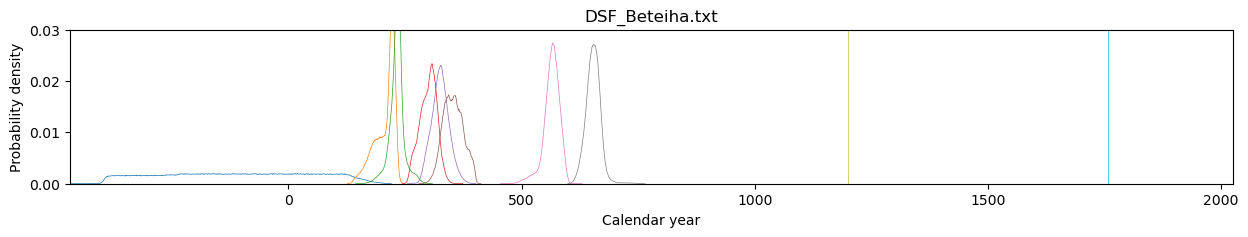

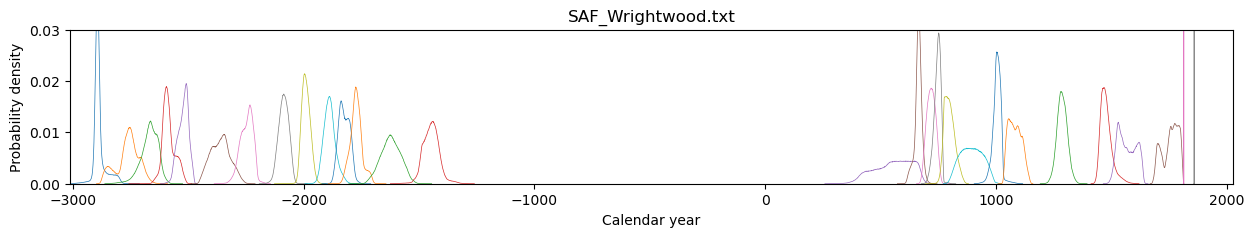

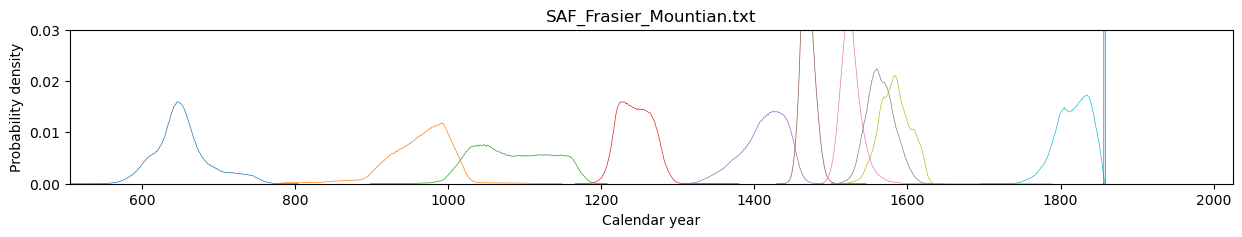

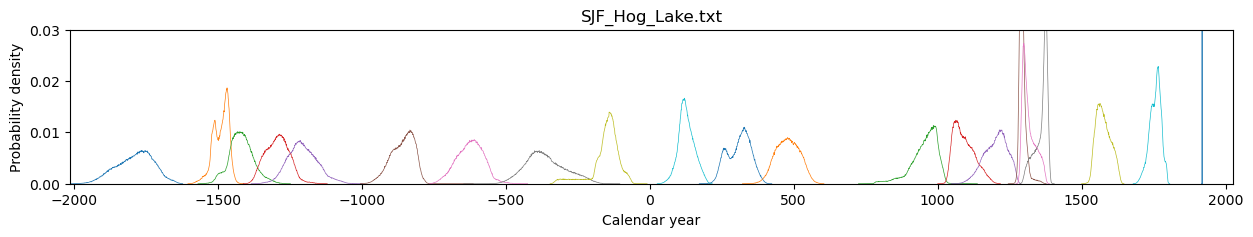

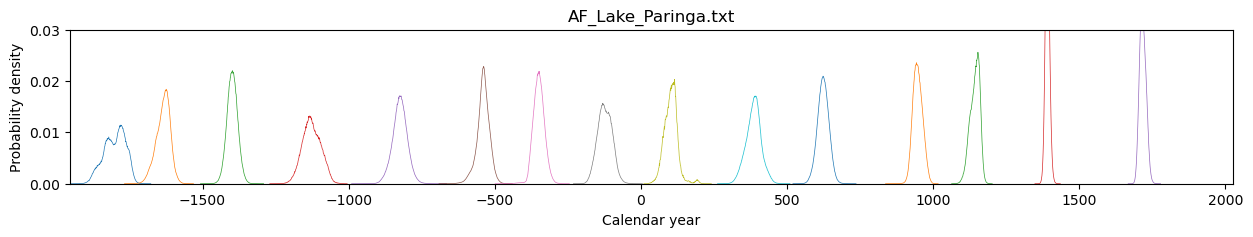

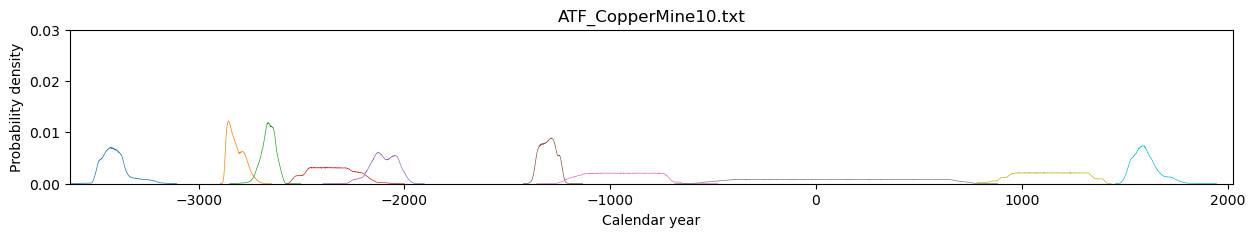

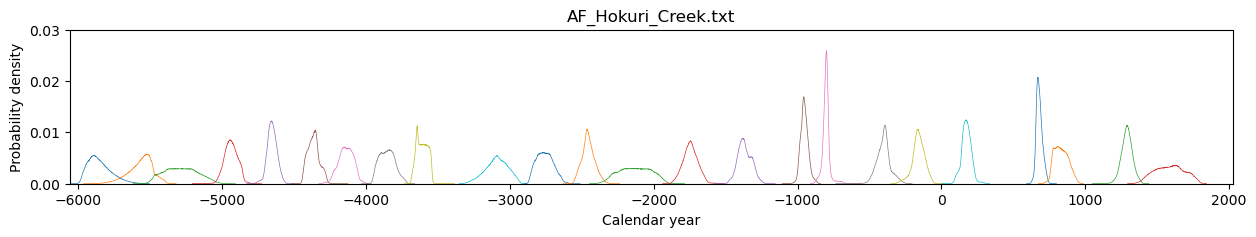

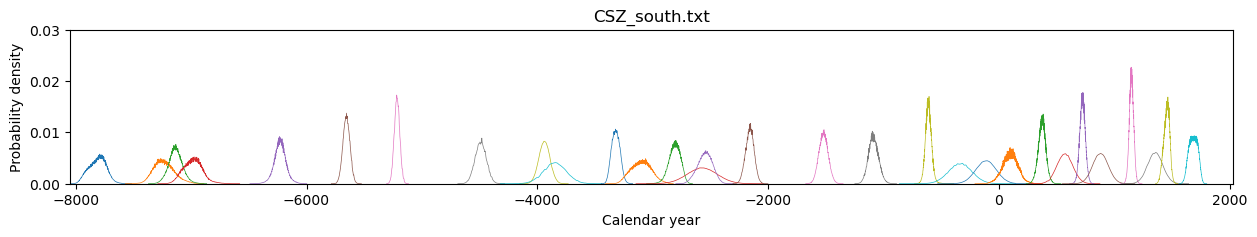

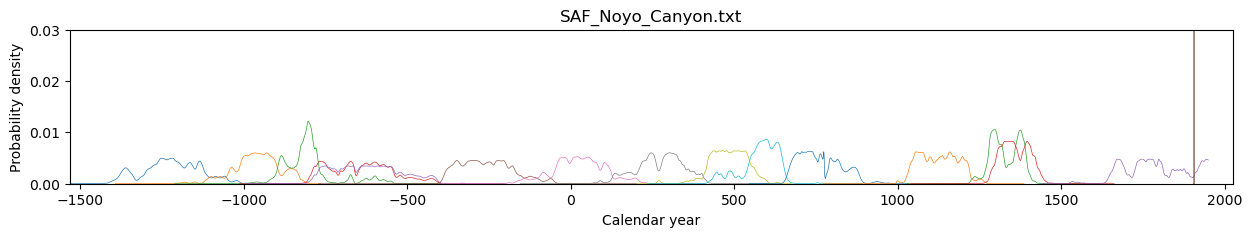

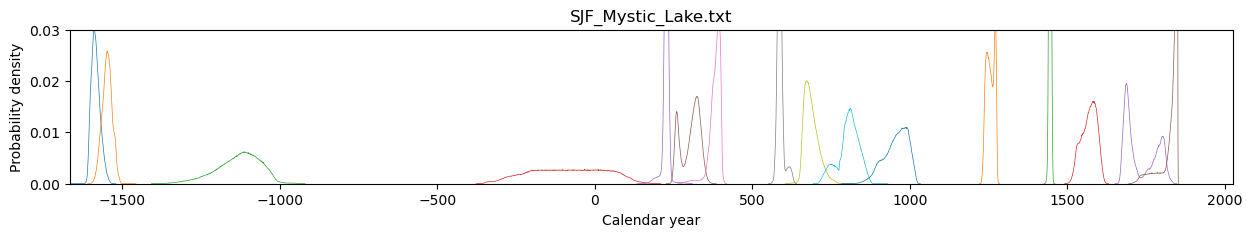

In [3]:
data_files = [f for f in os.listdir('data') if f.endswith('.txt')]

# read in the files
for file in data_files:
    trench_catalog = PaleoseismicCatalog(f'data/{file}')
    ax = trench_catalog.plot_pdfs()
    ax.set_title(file)

# get the average interval

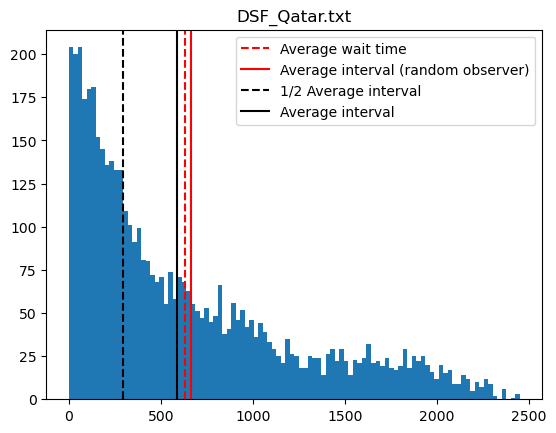

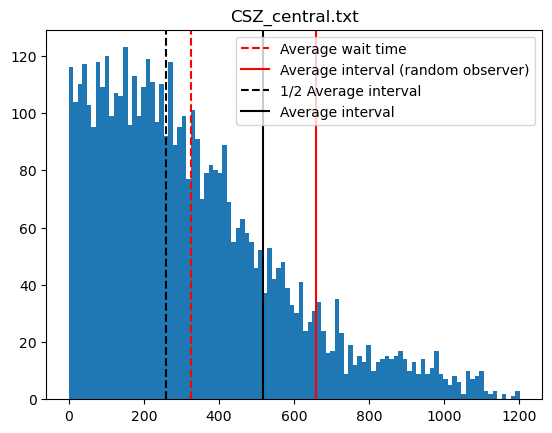

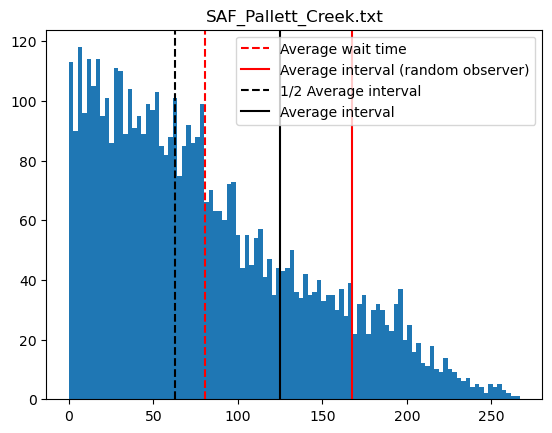

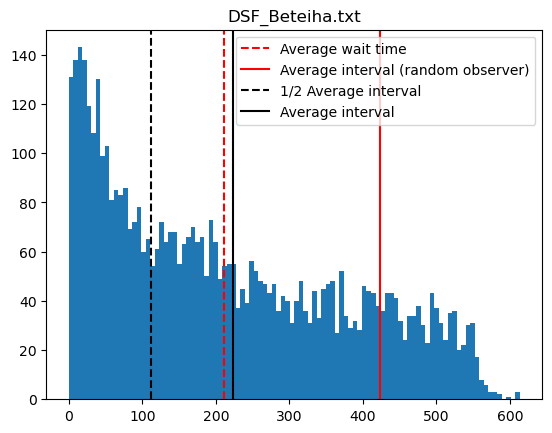

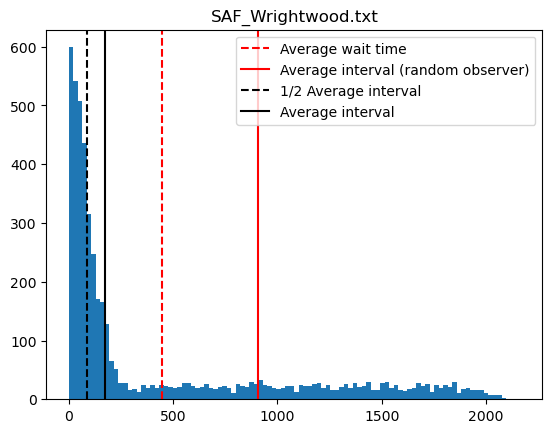

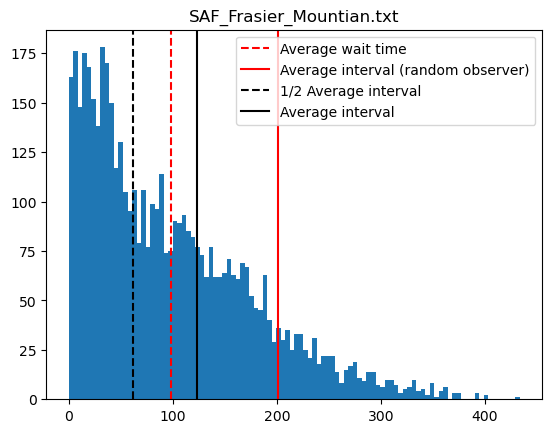

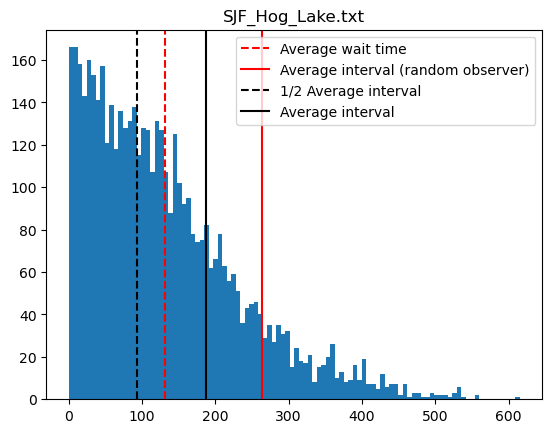

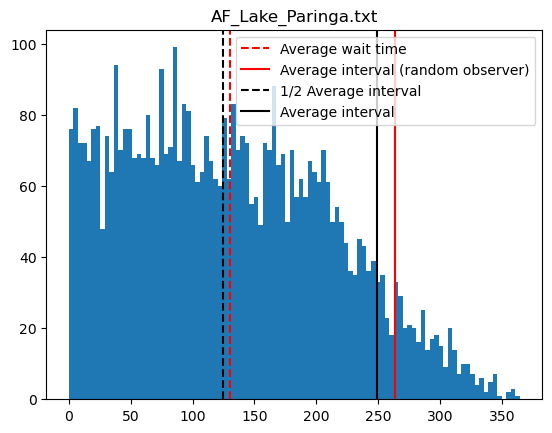

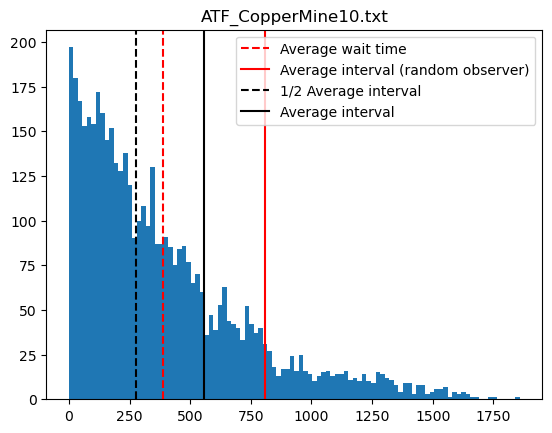

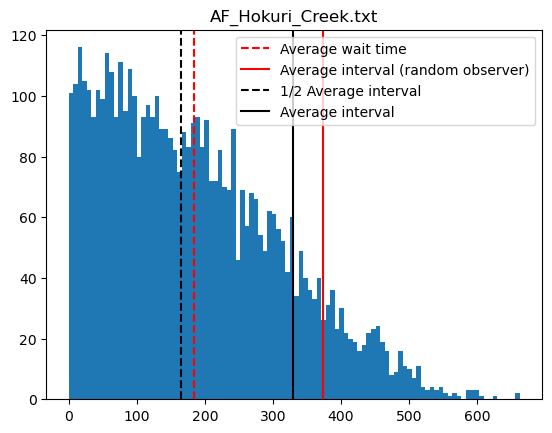

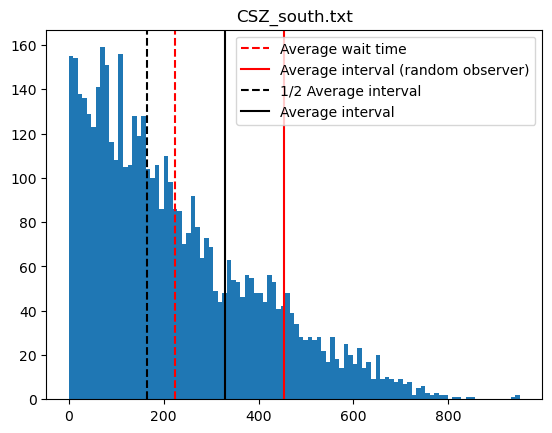

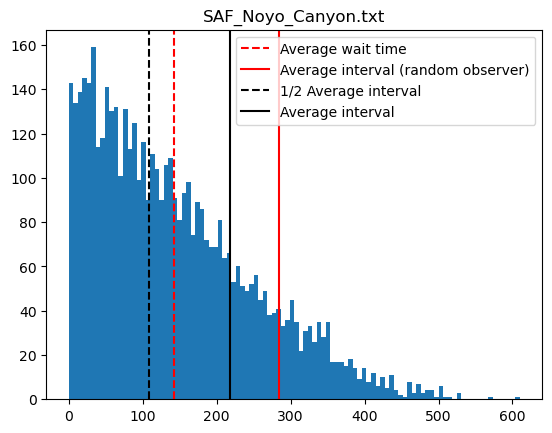

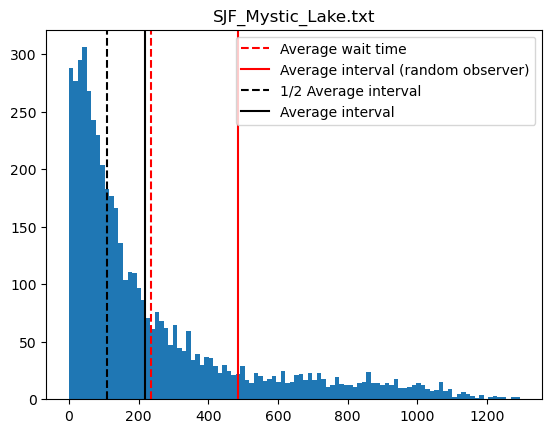

In [6]:
expected_waiting_time = []
expected_lapse_time = []
average_interval = []


for file in data_files:
    trench_catalog = PaleoseismicCatalog(f'data/{file}')
    ax, waiting_time, lapse_time = trench_catalog.visualize_waiting_time(number_of_samples=5000)
    ax.set_title(file)
    expected_waiting_time.append(np.nanmean(waiting_time))
    expected_lapse_time.append(np.nanmean(lapse_time))
    average_interval.append(trench_catalog.average_interval)


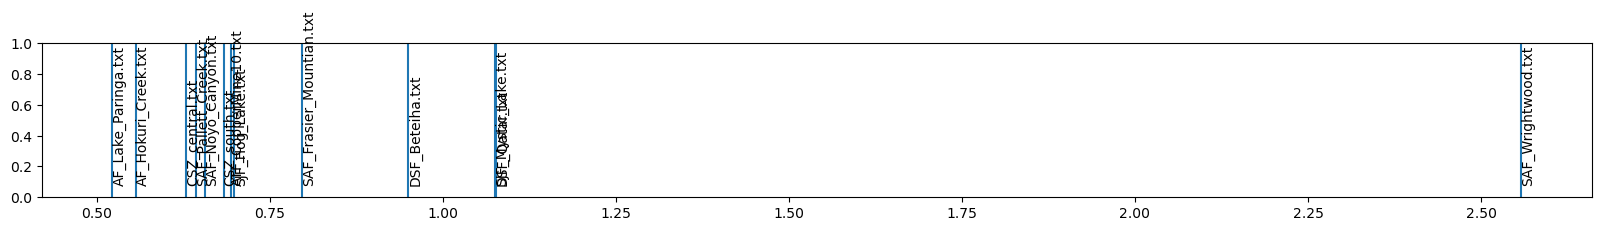

In [7]:
fig, ax = plt.subplots(figsize=(20,2))
for dt, T, fn in zip(expected_waiting_time, average_interval, data_files):
    ax.axvline(dt/T)
    ax.text(dt/T, 0.1, fn, rotation=90)